In [23]:
# Analysis of Economic Time Series (Python)

# prepare for Python version 3x features and functions
from __future__ import division, print_function

# import packages for time series analysis and modeling
import pandas as pd  # data structures for time series analysis
import datetime   date manipulation
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA  # time series modeling
from statsmodels.tsa.stattools import grangercausalitytests as granger

# additional time series functions available in R
# from rpy2.robjects import r  # interface from Python to R

# Economic time series were originally obtained from
# the Federal Reserve Bank of St. Louis (FRED system).

# read data in from comma-delimited text files
ER_data_frame = pd.read_csv("FRED_ER_data.csv")
DGO_data_frame = pd.read_csv("FRED_DGO_data.csv")
ICS_data_frame = pd.read_csv("FRED_ICS_data.csv")
NHS_data_frame = pd.read_csv("FRED_NHS_data.csv")

# identify date fields as dates with apply and lambda function
ER_data_frame['date'] = \
    ER_data_frame['date']\
    .apply(lambda d: datetime.datetime.strptime(str(d), '%Y-%m-%d'))
DGO_data_frame['date'] = \
    DGO_data_frame['date']\
    .apply(lambda d: datetime.datetime.strptime(str(d), '%Y-%m-%d'))
ICS_data_frame['date'] = \
    ICS_data_frame['date']\
    .apply(lambda d: datetime.datetime.strptime(str(d), '%Y-%m-%d'))
NHS_data_frame['date'] = \
    NHS_data_frame['date']\
    .apply(lambda d: datetime.datetime.strptime(str(d), '%Y-%m-%d'))

# create data frames indexed by date
ER_data = ER_data_frame.set_index(['date']) 
DGO_data = DGO_data_frame.set_index(['date']) 
ICS_data = ICS_data_frame.set_index(['date']) 
NHS_data = NHS_data_frame.set_index(['date']) 

# merge the time series data frames
economic_mts = pd.merge(ER_data, DGO_data,\
    how = 'outer', left_index = True, right_index = True)
economic_mts = pd.merge(economic_mts, ICS_data,\
    how = 'outer', left_index = True, right_index = True)
economic_mts = pd.merge(economic_mts, NHS_data,\
    how = 'outer', left_index = True, right_index = True)
    # select dates with complete data on all four series

economic_mts.shape

modeling_mts = economic_mts.dropna()

# select time series for multiple time series plot
initial_plotting_mts = pd.DataFrame(modeling_mts, columns = ["ER","DGO","ICS","NHS"])
initial_plotting_mts.head()

In [66]:
# using March 1997 as reference data 
modeling_mts.loc['1997-03-01']  # (ICS = 100 on this date)

ER       94.500
DGO     167.719
ICS     100.000
NHS      81.000
IER     100.000
IDGO    100.000
INHS    100.000
Name: 1997-03-01 00:00:00, dtype: float64

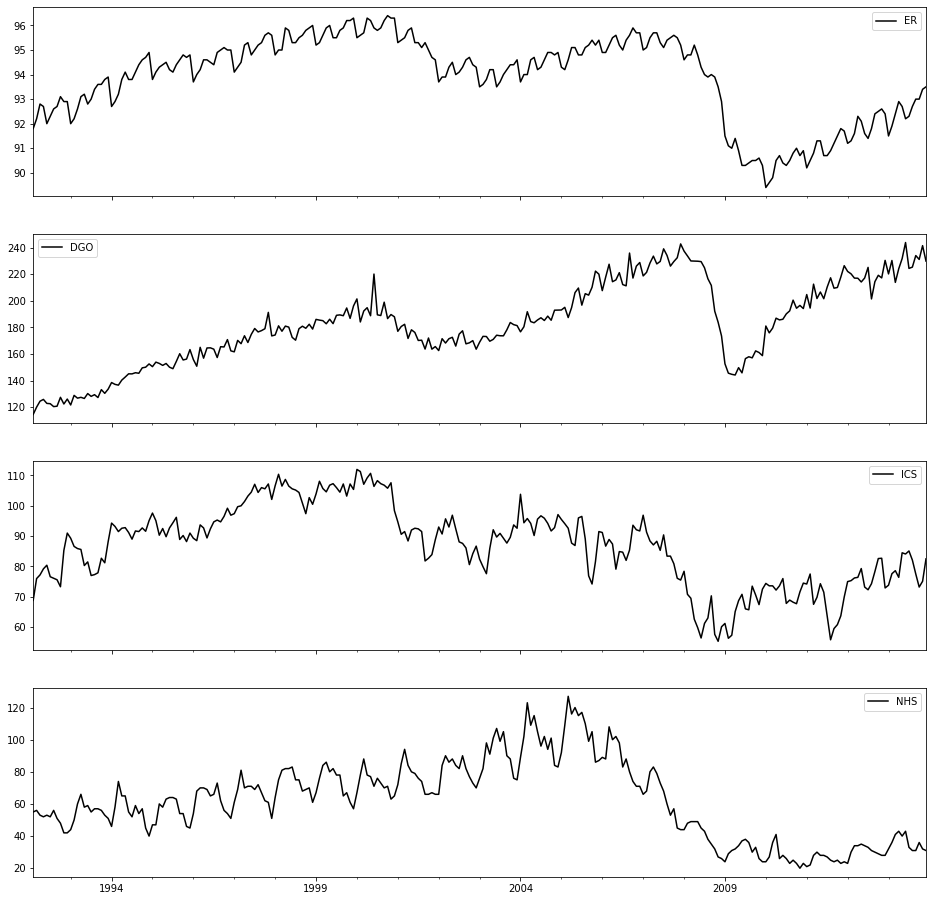

In [65]:
# multiple time series plot

initial_plotting_mts.plot(subplots = True, style = 'k-', sharex = True, figsize=(16,16))
plt.legend(loc = 'best')
plt.xlabel('')
plt.show()

## Interpretation

Seeing the housing market crash slowly (NHS) is remarkable, with a huge decline starting in 2007. It bottoms out around 2009 along with the rest of the market. I expected this to have happend as quickly as consumer spending.

We can see the huge, sudden dip in durable good orders (DGO) right at the turn of the year. It's interesting how everyone's spending, including that from manufacturers, came to a halt. It makes sense as to why it was such a bad time and why millions of people lost their homes - on top of the selfishness from housing lenders. Were we initally overspending?

This lack of spend impacted the employment rates greatly. We've seen this manifest in today's recession, especially in the world of tech. I would be interested in seeing these values in today's market! I would ask if there are mechanisms in place to protect workers and grant them benefits if they're laid off due to economic burden. What would stop the employer from reporting a layoff vs. firing? 

Finally, ICS shows a slight dip in spend for ~6 months before returning to around ~ of what it was a year prior. This is unique as the housing market was still at what looked to be an all-time low. This means peoples' spending habits changed. Did people feel confident spending their money on housing?

#### Acronyms


National Civilian Unemployment Rate (monthly, percentage)
     converted to the employment rate ER = 100 - UNRATENSA

 Manufacturers' New Orders: Durable Goods (millions of dollars) 
     DGO = DGORDER/1000 expressed in  billions of dollars 

 University of Michigan Index of Consumer Sentiment (1Q 1966 = 100)
     ICS = UMCSENT

 New Homes Sold in the US, not seasonally adjusted (monthly, millions)
     NHS = HSN1FNSA

#### ARIMA models / extras to see what's up

In [41]:
# return to the individual economic time series prior to indexing  
# functions from statsmodels package for time series forecasting 

# ARIMA model search for the Employment Rate
# ignoring seasonal adjustments
# loop across alternative settings for p and q 
# p is order of autoregressive process (1 or 2)
# q is order of moving-average process (1 or 2)
# choose model with lowest AIC
print('\nER_arima_model Search')
for pindex in range(2):
    for qindex in range(2):
        p = pindex + 1
        q = qindex + 1
        ER_arima_model = ARIMA(ER_data['ER'], order = (p,1,q)).fit()
        print('AR:', p, 'MA:', q, 'AIC:', ER_arima_model.aic)
# for first differenced ER models searched, AR p=2 MA q=2 is best
ER_arima_model_selected = ARIMA(ER_data['ER'], order = (2,1,2)).fit()
# fitted parameters of the selected model
print(ER_arima_model_selected.params)
# look-ahead forecasts needed 


ER_arima_model Search
AR: 1 MA: 1 AIC: 1067.5483018463156


c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non

AR: 1 MA: 2 AIC: 1043.0380250627281
AR: 2 MA: 1 AIC: 1030.9784668506452


c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non

AR: 2 MA: 2 AIC: 937.9247733679643


c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ar.L1    -0.068167
ar.L2    -0.869936
ma.L1     0.277524
ma.L2     0.943135
sigma2    0.187114
dtype: float64


In [67]:
# ARIMA model search for the Durable Goods Orders
# ignoring seasonal adjustments
# loop across alternative settings for p and q 
# p is order of autoregressive process (1 or 2)
# q is order of moving-average process (1 or 2)
# choose model with lowest AIC
print('\nDGO_arima_model Search')
for pindex in range(2):
    for qindex in range(2):
        p = pindex + 1
        q = qindex + 1
        DGO_arima_model = ARIMA(DGO_data['DGO'], order = (p,1,q)).fit()
        print('AR:', p, 'MA:', q, 'AIC:', DGO_arima_model.aic)        
# for first differenced DGO models searched, AR p=1 MA q=2 is best
DGO_arima_model_selected = ARIMA(DGO_data['DGO'], order = (1,1,2)).fit()
# fitted parameters of the selected model
print(DGO_arima_model_selected.params)



DGO_arima_model Search
AR: 1 MA: 1 AIC: 1810.429245639917


c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages

AR: 1 MA: 2 AIC: 1794.167550467584
AR: 2 MA: 1 AIC: 1805.6780356061167


c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages

AR: 2 MA: 2 AIC: 1805.9163601273458
ar.L1      0.762477
ma.L1     -1.251100
ma.L2      0.517927
sigma2    45.832910
dtype: float64


c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
# look-ahead forecasts needed 

# ARIMA model search for the Index of Consumer Sentiment
# ignoring seasonal adjustments
# loop across alternative settings for p and q 
# p is order of autoregressive process (1 or 2)
# q is order of moving-average process (1 or 2)
# choose model with lowest AIC
print('\nICS_arima_model Search')
for pindex in range(2):
    for qindex in range(2):
        p = pindex + 1
        q = qindex + 1
        ICS_arima_model = ARIMA(ICS_data['ICS'], order = (p,0,q)).fit()
        print('AR:', p, 'MA:', q, 'AIC:', ICS_arima_model.aic)
# for ICS models searched, AR p=2 MA q=2 is best
ICS_arima_model_selected = ARIMA(ICS_data['ICS'], order = (2,0,2)).fit()
# fitted parameters of the selected model
print(ICS_arima_model_selected.params)
# look-ahead forecasts needed 




ICS_arima_model Search
AR: 1 MA: 1 AIC: 2424.384017260144


c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages

AR: 1 MA: 2 AIC: 2422.115544935048
AR: 2 MA: 1 AIC: 2426.1082973113653


c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non

AR: 2 MA: 2 AIC: 2421.2311126804116
const     84.907424
ar.L1      1.474376
ar.L2     -0.487739
ma.L1     -0.536716
ma.L2     -0.105865
sigma2    15.388453
dtype: float64


c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [43]:
# ARIMA model search for New Homes Sold
# ignoring seasonal adjustments
# loop across alternative settings for p and q 
# p is order of autoregressive process (1 or 2)
# q is order of moving-average process (1 or 2)
# choose model with lowest AIC
print('\nNHS_arima_model Search')
for pindex in range(2):
    for qindex in range(2):
        p = pindex + 1
        q = qindex + 1
        NHS_arima_model = ARIMA(NHS_data['NHS'], order = (p,1,q)).fit()
        print('AR:', p, 'MA:', q, 'AIC:', NHS_arima_model.aic)
# for first differenced NHS models searched, AR p=2 MA q=2 is best 
NHS_arima_model_selected = ARIMA(NHS_data['NHS'], order = (2,1,2)).fit()
# fitted parameters of the selected model
print(NHS_arima_model_selected.params)
# look-ahead forecasts needed 


NHS_arima_model Search
AR: 1 MA: 1 AIC: 4043.0098774068574


c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages

AR: 1 MA: 2 AIC: 4034.1934574391007
AR: 2 MA: 1 AIC: 4042.7155673652373


c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non

AR: 2 MA: 2 AIC: 3970.052660722819
ar.L1      0.996334
ar.L2     -0.996521
ma.L1     -0.971415
ma.L2      0.978914
sigma2    35.746563
dtype: float64


c:\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [44]:
# Which regressors have potential as leading indicators?
# look for relationships across three of the time series
# using the period of overlap for those series

# does time series in second column "cause" time series in first column
print('Granger Tests')
# R form of test: grangertest(ICS~ER, order = 3, data=modeling.mts)
ICS_from_ER =  pd.DataFrame(modeling_mts, columns = ['ICS','ER'])
test = granger(ICS_from_ER, maxlag = 3, addconst=True, verbose=False)
print('ICS_from_ER:',test[3][0]['params_ftest'])

Granger Tests
ICS_from_ER: (2.1765910631058225, 0.09126851258771343, 253.0, 3.0)


In [45]:
# R form of test: grangertest(ICS~DGO, order = 3, data=modeling.mts)
ICS_from_DGO =  pd.DataFrame(modeling_mts, columns = ['ICS','DGO'])
test = granger(ICS_from_DGO, maxlag = 3, addconst=True, verbose=False)
print('ICS_from_DGO:',test[3][0]['params_ftest'])



ICS_from_DGO: (4.800098902161481, 0.0028607122857737225, 253.0, 3.0)


In [46]:
# R form of test: grangertest(DGO~ER, order = 3, data=modeling.mts)
DGO_from_ER =  pd.DataFrame(modeling_mts, columns = ['DGO','ER'])
test = granger(DGO_from_ER, maxlag = 3, addconst=True, verbose=False)
print('DGO_from_ER:',test[3][0]['params_ftest'])

DGO_from_ER: (3.5571170709184603, 0.01494529300708069, 253.0, 3.0)


In [47]:
# R form of test: grangertest(DGO~ICS, order = 3, data=modeling.mts)
DGO_from_ICS =  pd.DataFrame(modeling_mts, columns = ['DGO','ICS'])
test = granger(DGO_from_ICS, maxlag = 3, addconst=True, verbose=False)
print('DGO_from_ICS:',test[3][0]['params_ftest'])

DGO_from_ICS: (0.9972515219591572, 0.3947087795134865, 253.0, 3.0)


In [48]:
# R form of test: grangertest(ER~DGO, order = 3, data=modeling.mts)
ER_from_DGO =  pd.DataFrame(modeling_mts, columns = ['ER','DGO'])
test = granger(ER_from_DGO, maxlag = 3, addconst=True, verbose=False)
print('ER_from_DGO:',test[3][0]['params_ftest'])

ER_from_DGO: (0.5569459852452058, 0.6439306777418077, 253.0, 3.0)
